In [ ]:
import pandas as pd
import numpy as np

Imported dataset from UCI database

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
data

<ipython-input-2-f4ae75bc11ff>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv('/content/drive/MyDrive/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Creating a new column as terrains where *0(Road), 1(Desert), 2(Forest), 3(Snow)*

In [ ]:
terrains = np.random.choice([0,1,2,3], size=len(data))
data['terrain'] = terrains
data['mpg'] = data['mpg'] * np.where(terrains == 0, 1.0,
                                     np.where(terrains == 1, 0.8,
                                             np.where(terrains == 2, 0.7,
                                                     np.where(terrains == 3, 0.6, 1.0))))
data['liters_per_km'] = 235.215 / data['mpg']
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,terrain,liters_per_km
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0,13.067500
1,12.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,19.601250
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0,13.067500
3,11.2,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,2,21.001339
4,10.2,8,302.0,140.0,3449.0,10.5,70,1,ford torino,3,23.060294
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,0,8.711667
394,26.4,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,3,8.909659
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,0,7.350469
396,22.4,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1,10.500670


In [ ]:
data.drop(['car_name'],axis=1,inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,terrain,liters_per_km
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,13.067500
1,12.0,8,350.0,165.0,3693.0,11.5,70,1,1,19.601250
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,13.067500
3,11.2,8,304.0,150.0,3433.0,12.0,70,1,2,21.001339
4,10.2,8,302.0,140.0,3449.0,10.5,70,1,3,23.060294
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,0,8.711667
394,26.4,4,97.0,52.00,2130.0,24.6,82,2,3,8.909659
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,0,7.350469
396,22.4,4,120.0,79.00,2625.0,18.6,82,1,1,10.500670


In [ ]:
data.replace('?', np.nan, inplace=True)

In [ ]:
data.dropna(inplace=True)

Exploratory Data Analysis(EDA)

<ipython-input-7-d7095f07d9f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='terrain', y='liters_per_km', data=terrain_means, palette='Blues_d')


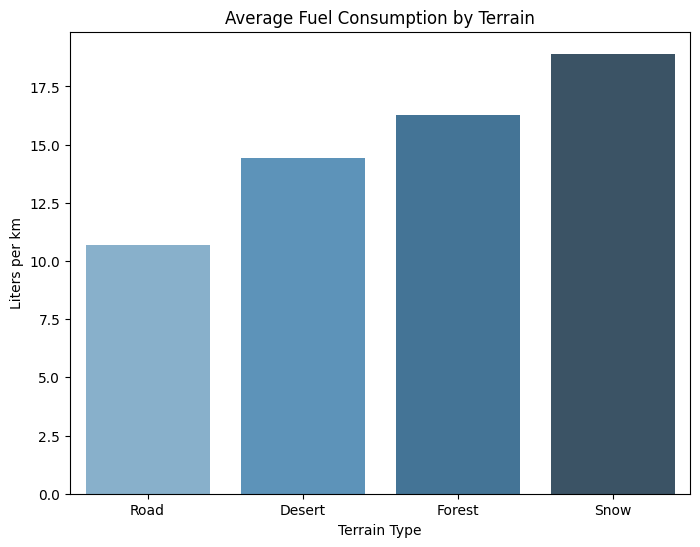

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
terrain_means = data.groupby('terrain')['liters_per_km'].mean().reset_index()
terrain_means['terrain'] = ['Road', 'Desert', 'Forest', 'Snow']
plt.figure(figsize=(8, 6))
sns.barplot(x='terrain', y='liters_per_km', data=terrain_means, palette='Blues_d')
plt.title('Average Fuel Consumption by Terrain')
plt.xlabel('Terrain Type')
plt.ylabel('Liters per km')
plt.show()

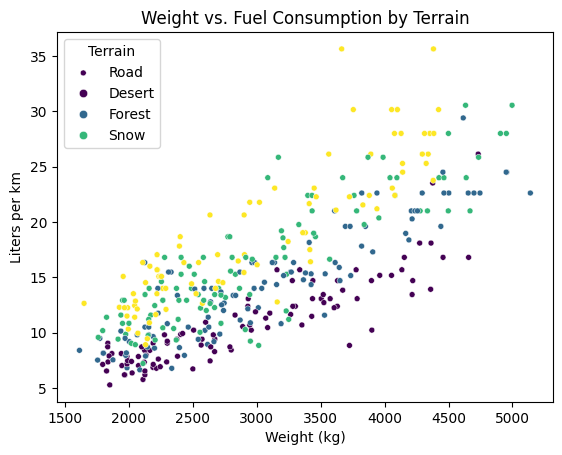

In [ ]:
sns.scatterplot(x='weight', y='liters_per_km', hue='terrain', data=data, palette='viridis', size=10)
plt.title('Weight vs. Fuel Consumption by Terrain')
plt.xlabel('Weight (kg)')
plt.ylabel('Liters per km')
plt.legend(title='Terrain', labels=['Road', 'Desert', 'Forest', 'Snow'])
plt.show()

Spliting datas as Features and Target

In [ ]:
X=data.iloc[:,1:-1]
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,terrain
0,8,307.0,130.0,3504.0,12.0,70,1,0
1,8,350.0,165.0,3693.0,11.5,70,1,1
2,8,318.0,150.0,3436.0,11.0,70,1,0
3,8,304.0,150.0,3433.0,12.0,70,1,2
4,8,302.0,140.0,3449.0,10.5,70,1,3
...,...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,1,0
394,4,97.0,52.00,2130.0,24.6,82,2,3
395,4,135.0,84.00,2295.0,11.6,82,1,0
396,4,120.0,79.00,2625.0,18.6,82,1,1


In [ ]:
y=data.iloc[:,-1]
y

,liters_per_km
0,13.067500
1,19.601250
2,13.067500
3,21.001339
4,23.060294
...,...
393,8.711667
394,8.909659
395,7.350469
396,10.500670


Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaler=scaler.fit_transform(X)
X_scaler

array([[1.        , 0.61757106, 0.45652174, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.72868217, 0.64673913, ..., 0.        , 0.        ,
        0.33333333],
       [1.        , 0.64599483, 0.56521739, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.13436693, 0.17934783, ..., 1.        , 0.        ,
        0.33333333],
       [0.2       , 0.13178295, 0.19565217, ..., 1.        , 0.        ,
        0.66666667]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.3,random_state=10)

Creating Models

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
svr=SVR()
rfr=RandomForestRegressor(random_state=10)
ada=AdaBoostRegressor(random_state=10)
xgb=XGBRegressor(random_state=10)
models=[svr,rfr,ada,xgb]


In [ ]:
for model in models:
  print("-----------------------------------------------------")
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2_score:',r2_score(y_test,y_pred))
  print('Mean squared error:',mean_squared_error(y_test,y_pred))
  print('Mean absolute error:',mean_absolute_error(y_test,y_pred))

-----------------------------------------------------
SVR()
r2_score: 0.8639342295810779
Mean squared error: 5.2952609804277015
Mean absolute error: 1.5426261936954488
-----------------------------------------------------
RandomForestRegressor(random_state=10)
r2_score: 0.8904188560559155
Mean squared error: 4.264560836507396
Mean absolute error: 1.4816816945512319
-----------------------------------------------------
AdaBoostRegressor(random_state=10)
r2_score: 0.8498242176035384
Mean squared error: 5.844379216615936
Mean absolute error: 1.8284312496684767
-----------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, 

As we can see XGBoost is the better model

New Prediction

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,terrain,liters_per_km
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,13.067500
1,12.0,8,350.0,165.0,3693.0,11.5,70,1,1,19.601250
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,13.067500
3,11.2,8,304.0,150.0,3433.0,12.0,70,1,2,21.001339
4,10.2,8,302.0,140.0,3449.0,10.5,70,1,3,23.060294
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,0,8.711667
394,26.4,4,97.0,52.00,2130.0,24.6,82,2,3,8.909659
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,0,7.350469
396,22.4,4,120.0,79.00,2625.0,18.6,82,1,1,10.500670


In [ ]:
data.model_year.value_counts()

,count
model_year,
73,40
78,36
76,34
75,30
82,30
70,29
79,29
72,28
77,28


In [ ]:
y_new=xgb.predict(scaler.transform([[6,250.0,130.0,2649.0,12.5,80,1,2]]))
print(y_new)

[14.7645]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(xgb,open('model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scaler.sav','wb'))